/usr/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


importing Jupyter notebook from planta.ipynb
R2a = 33000.0
R2b = 39000.0
R1 = 17875.0
R1 = 68000.0
C1 = 7e-07
C2 = 1e-07
wn = 17.254152413997854

        1.175e+04
-------------------------
s^2 + 100.9 s + 1.175e+04

T.size: 100
T.shape: (100,)
yout.size: 100
yout.shape: (100,)
{
    "RiseTime": 0.014011321365033157,
    "SettlingTime": 0.049039624777616045,
    "SettlingMin": 0.9277838533587892,
    "SettlingMax": 1.1913022492293326,
    "Overshoot": 19.24899706442737,
    "Undershoot": 0.0,
    "Peak": 1.1913022492293326,
    "PeakTime": 0.03222603913957626,
    "SteadyStateValue": 0.9990039988224811
}
v0 = 1.0 v
vinf = 1.49 v
deltav = 0.49 v
v10 = 1.049 v
v90 = 1.441 v
t10 = 0.0048 s
t90 = 0.0198 s
RiseTime = 0.015000000000000003 s
deltav = 0.49 v
v50 = 1.245 v
Delay = 0.012 s
PeakTime = 0.0334 s
PeakValue = 1.57 v
OverShoot = 16.326530612244913 %
sup_margin = 1.5145 v
inf_margin = 1.4655 v
SettlingTime = 0.0476 s
zeta = 0.4997062054306522
wn = 108.58948003681807
zeta_check = 0.4997

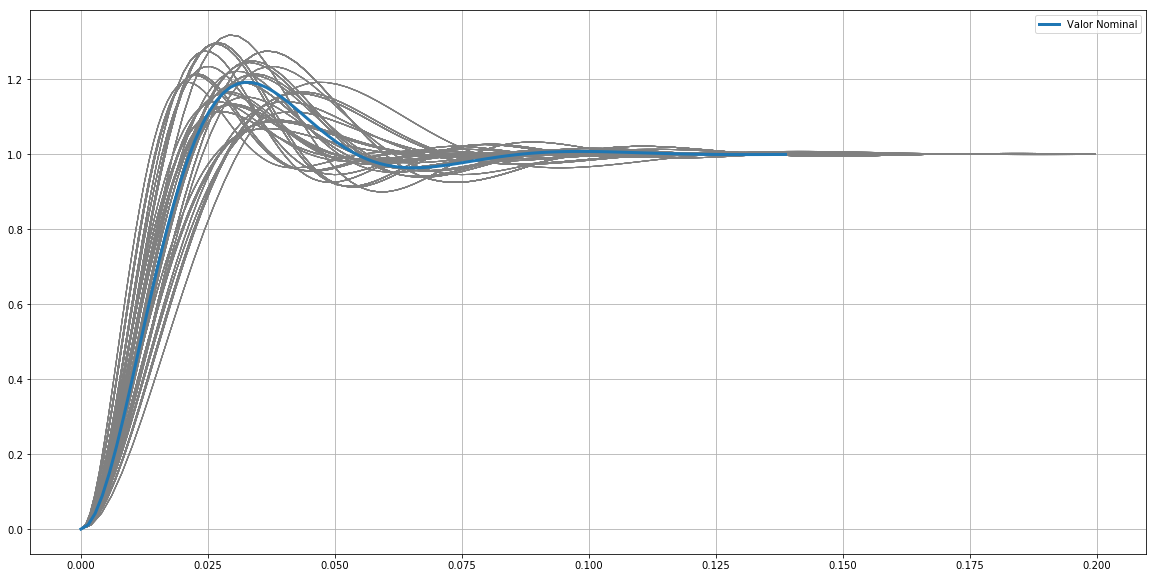

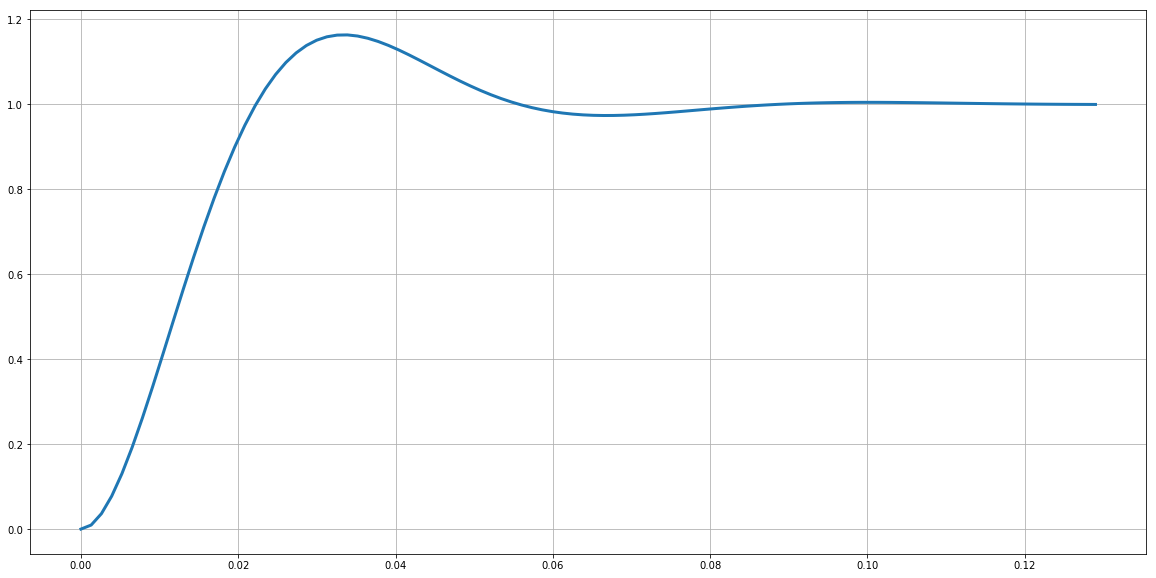

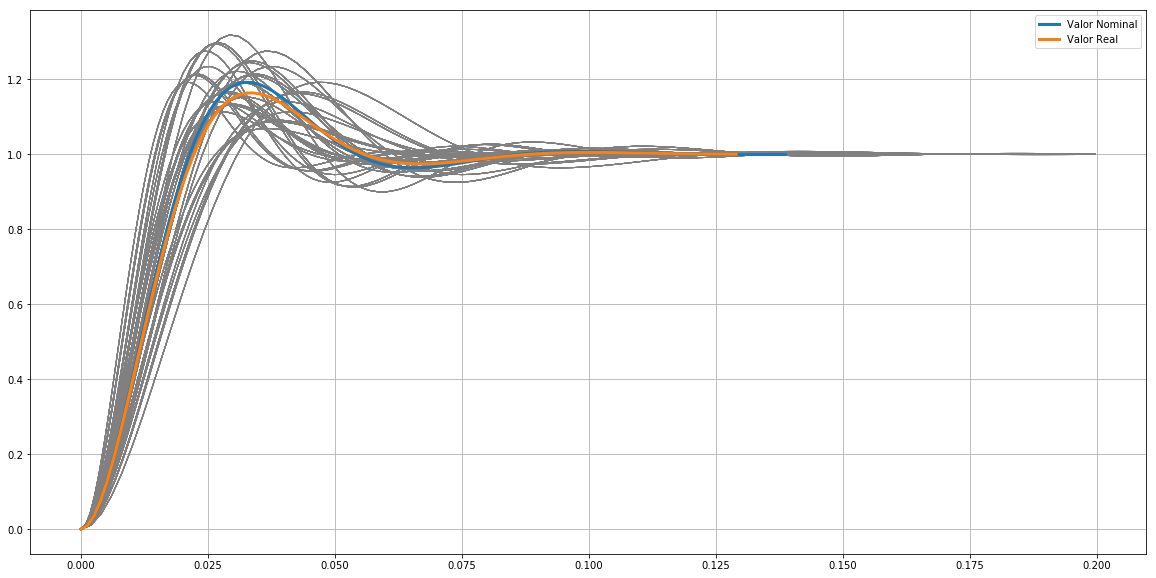

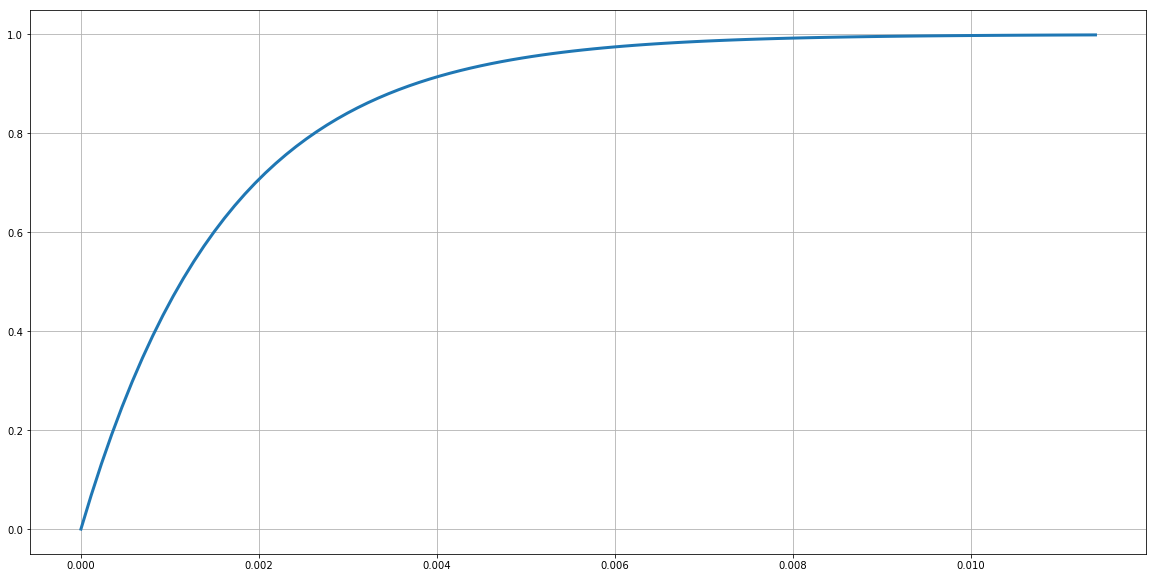

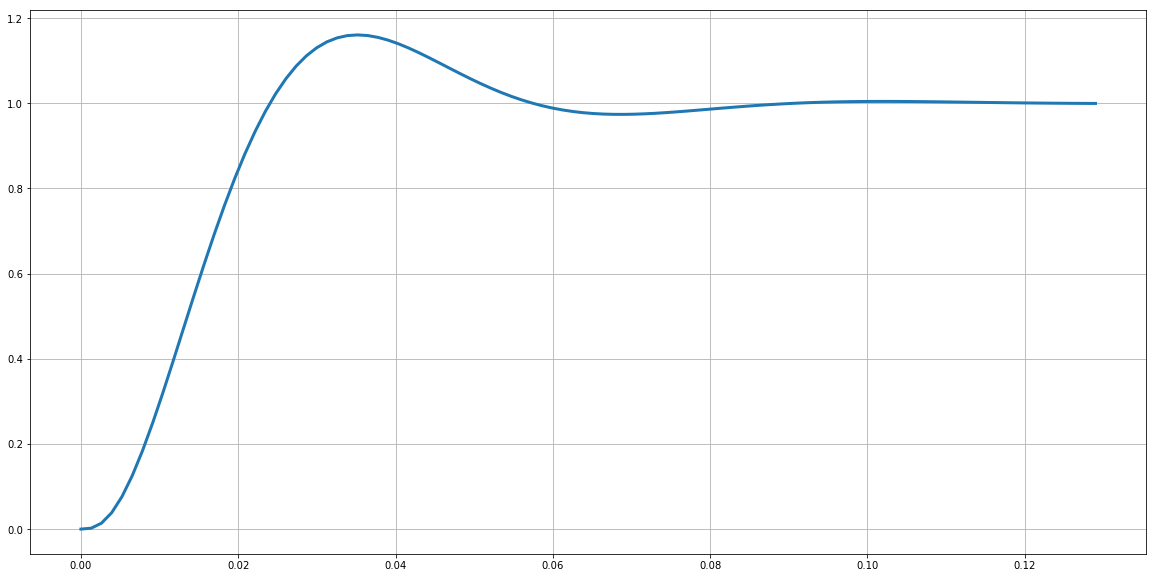

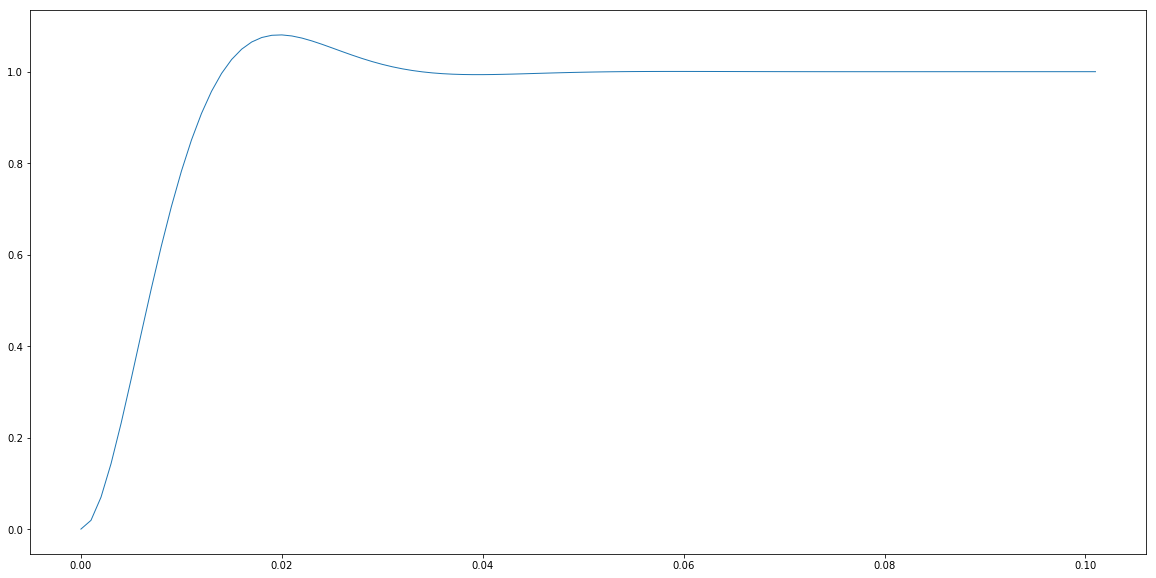

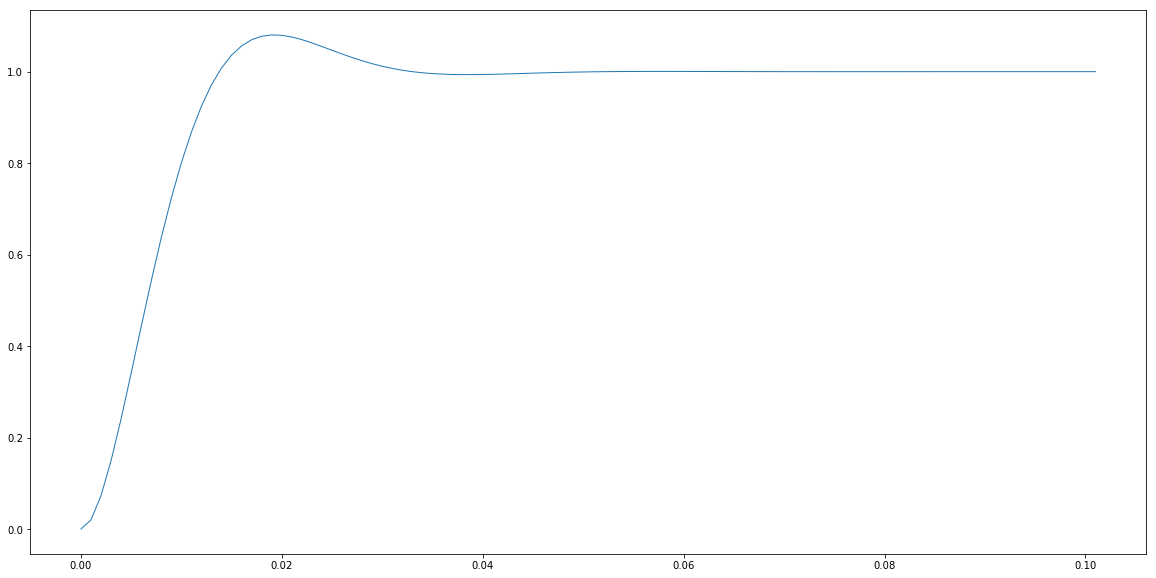

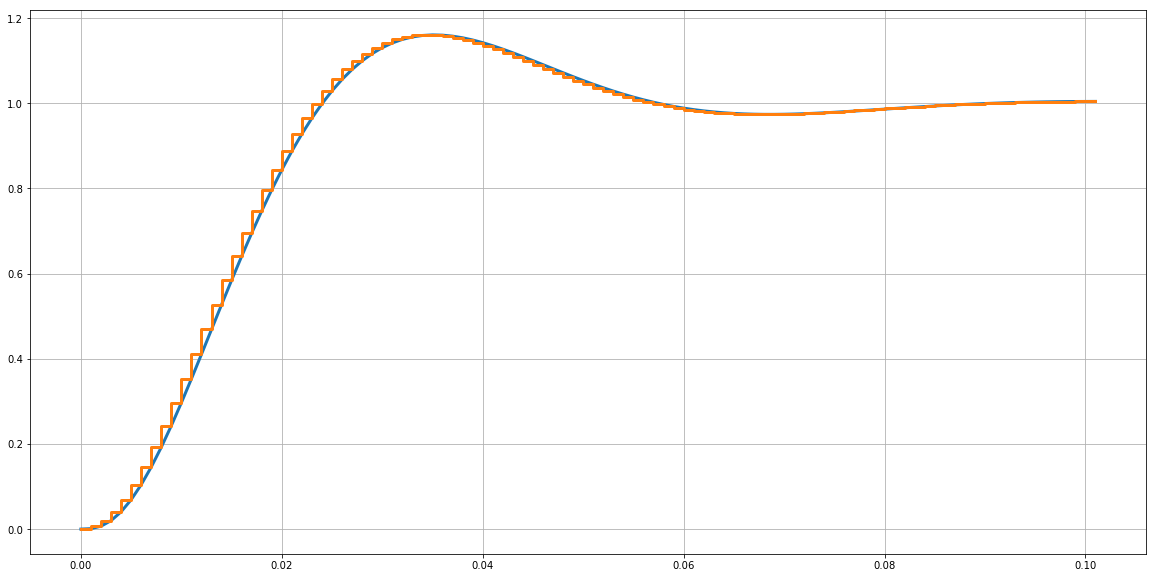

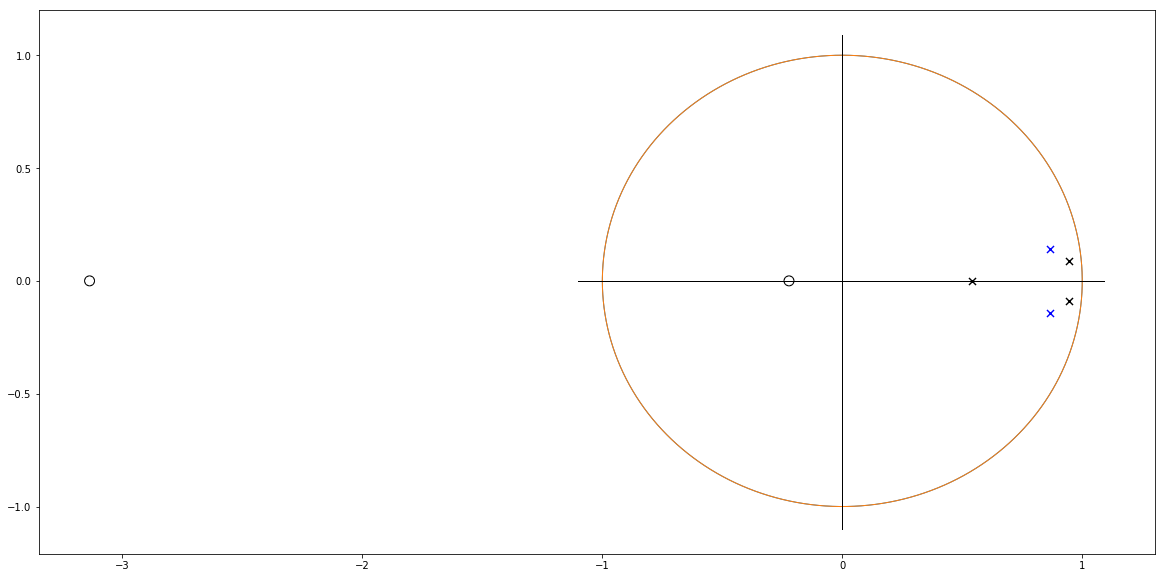

In [1]:
import import_ipynb
from planta import *
from requisitos import *

# autoreload sets up auto reloading of modified .py modules
import autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload


0.001013 z^2 + 0.003402 z + 0.0007061
-------------------------------------
  z^3 - 2.427 z^2 + 1.918 z - 0.4856

dt = 0.001

zeros: [-3.13711442 -0.22222326]
polos: [0.94299624+0.08896041j 0.94299624-0.08896041j 0.54124699+0.j        ]


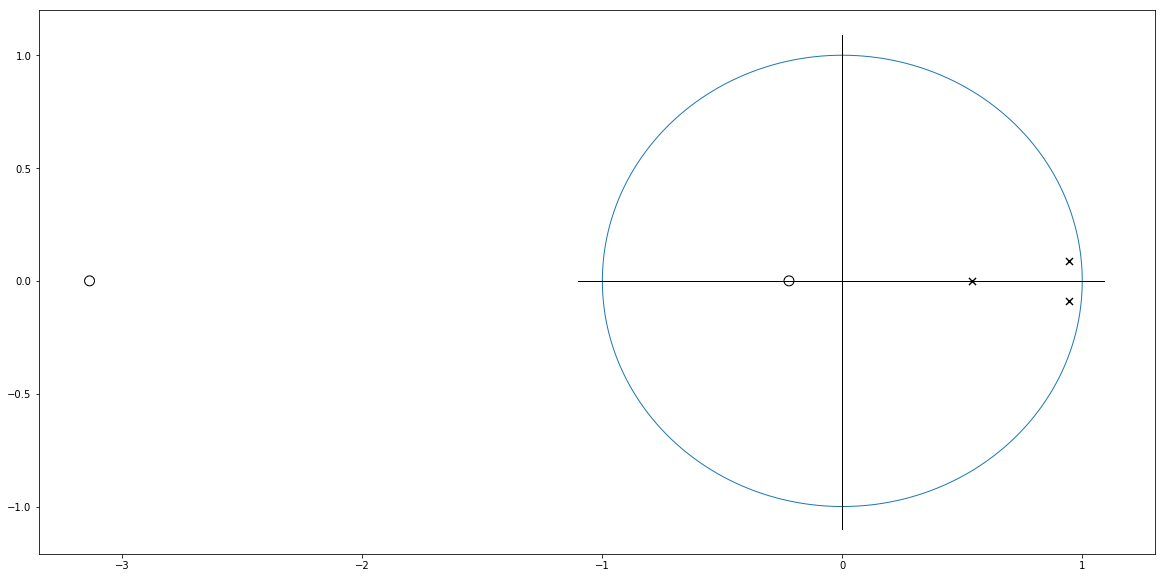

In [2]:
plt.figure(figsize=(20,10))
zplane(G_z)
print(G_z)
print(f'zeros: {zero(G_z)}')
print(f'polos: {pole(G_z)}')

Gd = ([[array([ 1.        , -1.88599248,  0.89715586])]], [[array([ 1, -1])]])
2 states have been removed from the model
Gg_z = 
0.001013 z^2 + 0.003402 z + 0.0007061
-------------------------------------
        z^2 - 1.541 z + 0.5412

dt = 0.001


  1
-----
z - 1

dt = 0.001



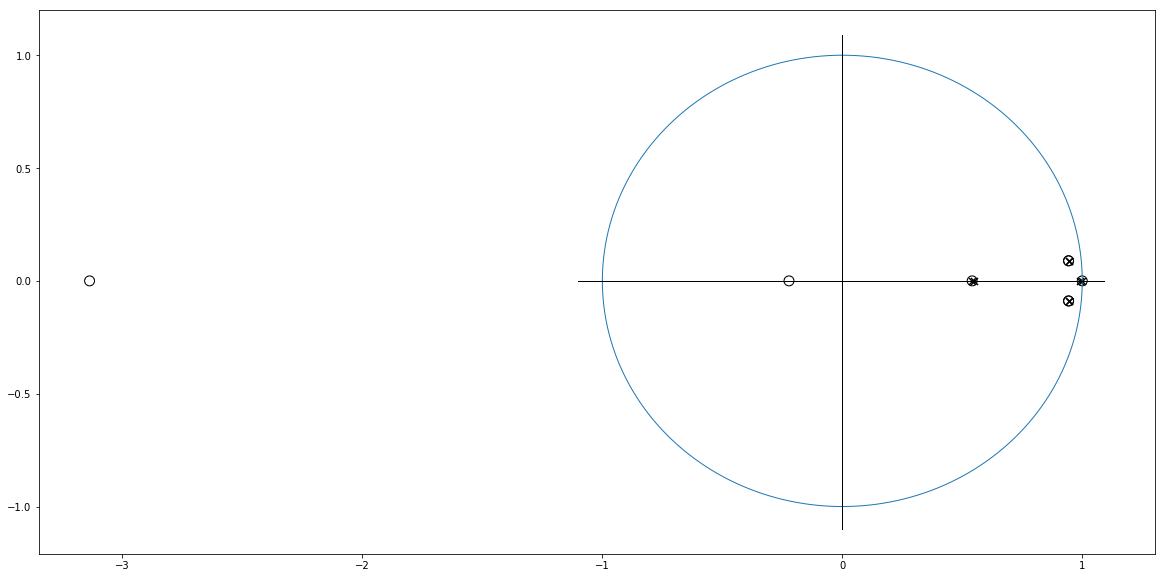

In [11]:
z = zero(G_z)
p = pole(G_z)

integrador = tf([0, 1], [1, -1], Ts)
cancelamento = tf(np.poly(pole(G_z)[0:2]), 1, Ts)
H = 1
plt.figure(figsize=(20,10))
Gg_z = G_z * cancelamento * integrador
print(f'Gd = {tfdata(cancelamento * integrador)}')
zplane(Gg_z/(1 + (Gg_z * H)))
Gg_z = minreal(Gg_z)
print(f'Gg_z = {Gg_z}')
print(integrador)

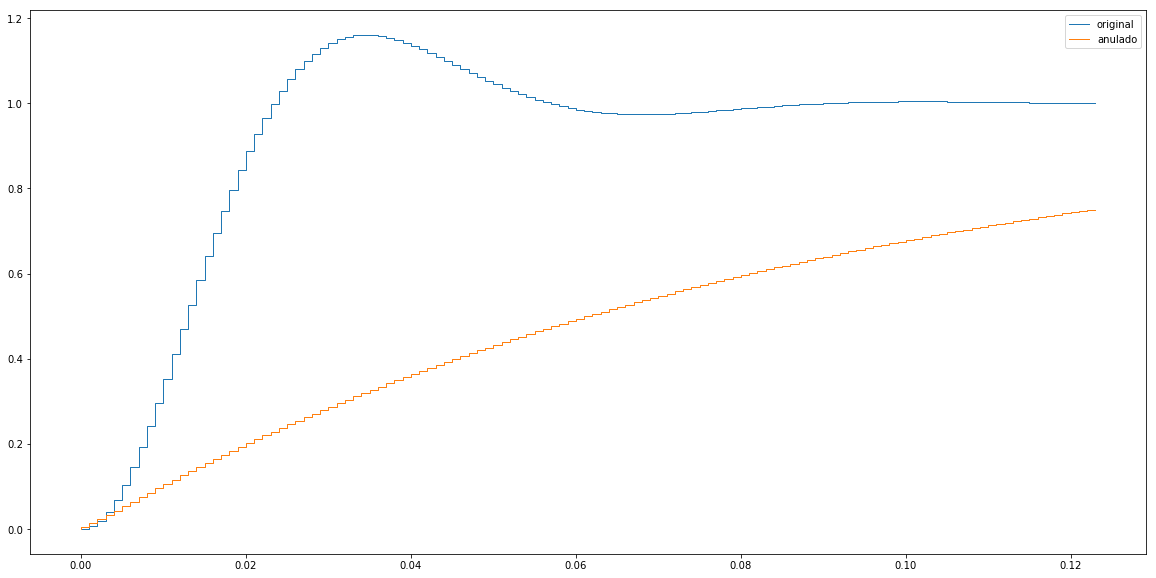

In [4]:
plt.figure(figsize=(20,10))
final_time = 5 * ReqFact['SettlingTime']
T = np.arange(final_time / Ts) * Ts
yout, T = step(G_z, T)
plt.step(T, yout)
yout, T = step(Gg_z / (1 + (Gg_z * H)), T)
plt.step(T, yout)
plt.legend(['original', 'anulado'])

Identificamos os seus polos e zeros:

In [5]:
poles = pole(G_z)
zeros = zero(G_z)

print(f'polos: {poles}')
print(f'zeros: {zeros}')

polos: [0.94299624+0.08896041j 0.94299624-0.08896041j 0.54124699+0.j        ]
zeros: [-3.13711442 -0.22222326]


Considerando a planta do controlador como:

$$ 
    G_D(z) = K\,
    \frac{(z+\alpha)(z+\alpha^*)}{(z-1)(z+\beta)} $$

In [6]:
# alpha para cancelar o polo complexo do controlador
alpha = pole(G_z)[0]
print(f'a = {alpha}')

a = (0.942996238642726+0.08896041149575773j)


Para que $P_1$ seja o lugar das raízes, a soma dos ângulos de polos e zeros em relação à $P_1$ deve ser igual a $\pm$ 180°:

Ângulo dos polos: -2.2542774744995544 rad, -129.16058514023453°
Ângulo dos zeros: -1.6878597011287606 rad, -96.7072372848905°
Somatório dos ângulos: 0.5664177733707938 rad, 32.453347855344035°
Ângulo que o polo do controlador deve fornecer: 1.0043785534241032 rad, 57.546652144655994°
b = 0.641193772122912


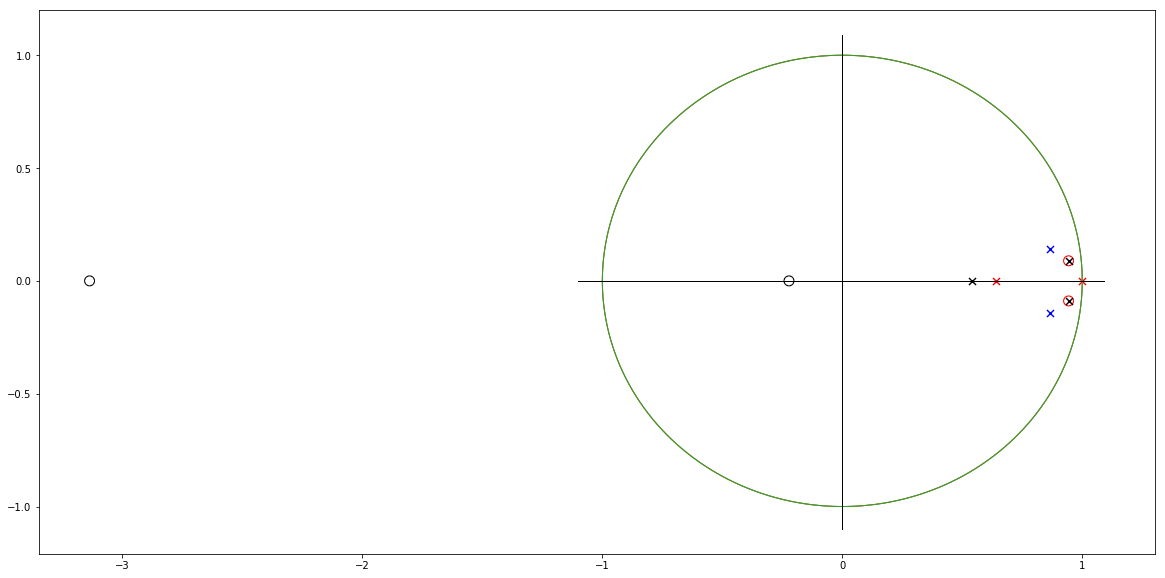

In [7]:
def wrap(angle):
    return np.arctan(np.tan(angle))

angle_zeros = np.sum(wrap(np.angle(p1 -zero(G_z * H * cancelamento * integrador))))
angle_poles = np.sum(wrap(np.angle(p1 -pole(G_z * H * cancelamento * integrador))))
angle_sum = angle_zeros - angle_poles
alpha_angle = np.angle(alpha -alpha.conjugate())
angle_beta = wrap(-np.pi - angle_sum -alpha_angle)

print(f'Ângulo dos polos: {angle_poles} rad, {np.rad2deg(angle_poles)}°')
print(f'Ângulo dos zeros: {angle_zeros} rad, {np.rad2deg(angle_zeros)}°')
print(f'Somatório dos ângulos: {angle_sum} rad, {np.rad2deg(angle_sum)}°')
print(f'Ângulo que o polo do controlador deve fornecer: {angle_beta} rad, {np.rad2deg(angle_beta)}°')

# Considerando dois triângulos retângulos podemos:
beta = ( p1.real +np.tan(angle_beta) * (-(p1).imag) )
print(f'b = {beta}')

Gd_z_over_k = tf(1, np.poly([beta]), Ts) * cancelamento * integrador
plt.figure(figsize=(20,10))
zplane(Gd_z_over_k, color='red')
zplane(G_z)
zplane(polo_dominante_desejado, color='blue')

O ganho $K$ pode ser determinado pela condição de módulo:

$$ |G_D(z) * G(z)|_{z = z1} = 1 $$

2 states have been removed from the model
k = (4.148765765461027+6.746880173333975e-12j)
k = 4.148765765461027
Gd(z) = 
4.149 z^2 - 7.825 z + 3.722
---------------------------
  z^2 - 1.641 z + 0.6412

dt = 0.001

2 states have been removed from the model
FTMA(z) = 
0.004202 z^2 + 0.01412 z + 0.002929
-----------------------------------
 z^3 - 2.182 z^2 + 1.529 z - 0.347

dt = 0.001

3 states have been removed from the model
FTMF(z) = 
0.004202 z^6 - 0.001734 z^5 - 0.02783 z^4 + 0.05027 z^3 - 0.02871 z^2 + 0.001449 z + 0.002358
---------------------------------------------------------------------------------------------
      z^7 - 5.95 z^6 + 15.11 z^5 - 21.21 z^4 + 17.73 z^3 - 8.818 z^2 + 2.407 z - 0.277

dt = 0.001



<Figure size 1440x720 with 0 Axes>

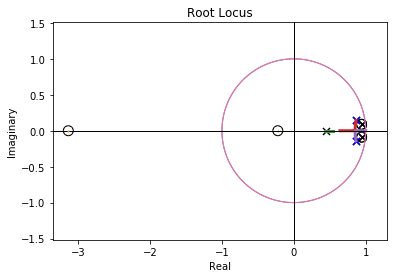

In [17]:
plt.figure(figsize=(20,10))
FTMA_over_k = minreal(Gd_z_over_k * G_z * H)

k = -np.polyval(FTMA_over_k.den[0][0], p1) / np.polyval(FTMA_over_k.num[0][0], p1)
if np.abs(k.imag) > 1e-10:
    print('Não há valor de k que garanta que P1 seja o lugar das raízes.')
print(f'k = {k}')
k = np.abs(k)
print(f'k = {k}')

Gd_z = k * Gd_z_over_k
FTMD = Gd_z * G_z
FTMA = FTMD * H

print(f'Gd(z) = {Gd_z}')

print(f'FTMA(z) = {minreal(FTMA)}')
FTMF = minreal(FTMD / (1 + FTMA))
print(f'FTMF(z) = {FTMF}')
yout, _ = rlocus(FTMA_over_k, np.linspace(0, k, 1000));

zplane(FTMF)
zplane(polo_dominante_desejado, color='blue')

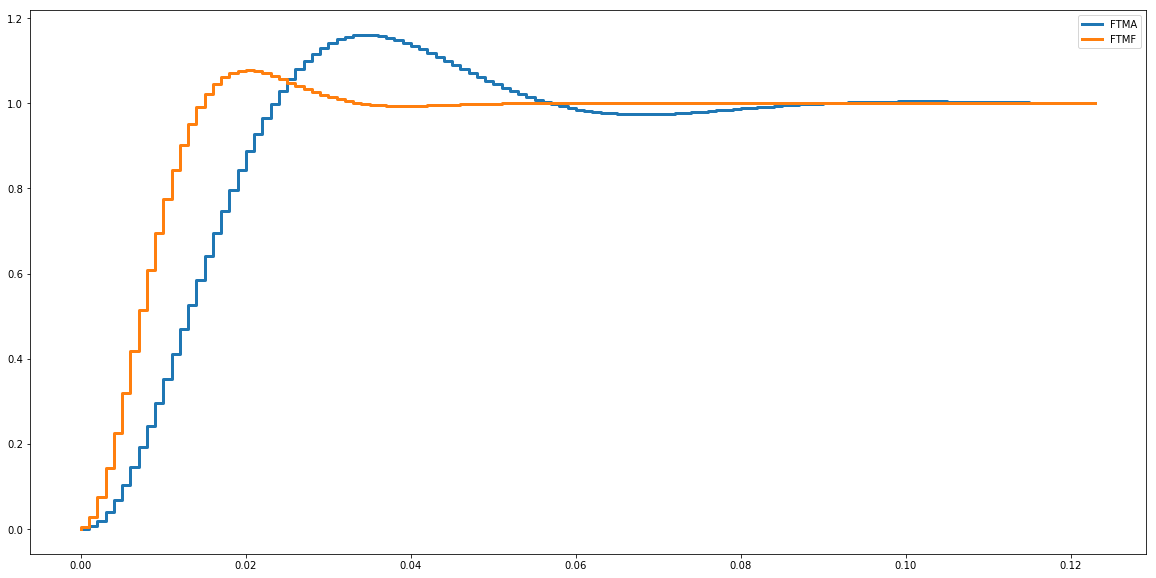

In [19]:
plt.figure(figsize=(20,10))
final_time = 5 * ReqFact['SettlingTime']
T = np.arange(final_time / Ts) * Ts
yout, T = step(G_z, T)
plt.step(T, yout, lw=3)
yout, T = step(FTMF, T)
plt.step(T, yout, lw=3)
plt.legend(['FTMA', 'FTMF'])

In [20]:
print(f'Gd(z) = {Gd_z}')
print('\n-> Sem controlador:')
print(json.dumps(S, indent=4))
print('\n-> Com controlador:')
FTMF_info = mystepinfo(FTMF, SettlingTimeThreshold=SettlingTimeThreshold)
print(json.dumps(FTMF_info, indent=4))
print('\n-> Requisitos:')
print(json.dumps(Req, indent=4))
print('\n-> Requisitos com fator:')
print(json.dumps(ReqFact, indent=4))

Gd(z) = 
4.149 z^2 - 7.825 z + 3.722
---------------------------
  z^2 - 1.641 z + 0.6412

dt = 0.001


-> Sem controlador:
{
    "RiseTime": 0.015636573668080363,
    "SettlingTime": 0.050818864421261184,
    "SettlingMin": 0.9339053112958997,
    "SettlingMax": 1.160441046696975,
    "Overshoot": 16.101438379329213,
    "Undershoot": 0.0,
    "Peak": 1.160441046696975,
    "PeakTime": 0.03518229075318082,
    "SteadyStateValue": 0.9995061757164077
}

-> Com controlador:
{
    "RiseTime": 0.009000000000000001,
    "SettlingTime": 0.026000000000000002,
    "SettlingMin": 0.9027008702790962,
    "SettlingMax": 1.0770360467125784,
    "Overshoot": 7.702625114499258,
    "Undershoot": 0.0,
    "Peak": 1.0770360467125784,
    "PeakTime": 0.021,
    "SteadyStateValue": 1.0000090950128424
}

-> Requisitos:
{
    "SettlingTime": 0.025409432210630592,
    "Overshoot": 8.050719189664607
}

-> Requisitos com fator:
{
    "SettlingTime": 0.02475790830779391,
    "Overshoot": 8.044706063997465
}
